In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("loan_dataset.csv")

In [3]:
data

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,382119962287,Y,Browning-Hart,4.125,153000,360,2012-02-01,04/2012,88,2.0,...,0,0,0,0,0,0,0,0,0,0
116054,582803915466,Z,OTHER,3.000,150000,120,2012-01-01,03/2012,35,1.0,...,0,0,0,0,0,0,0,0,0,0
116055,837922316947,X,OTHER,3.875,166000,360,2012-02-01,04/2012,58,2.0,...,0,0,0,0,0,0,0,0,0,0
116056,477343182138,X,OTHER,4.250,169000,360,2012-02-01,04/2012,74,2.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   116058 non-null  int64  
 1   source                    116058 non-null  object 
 2   financial_institution     116058 non-null  object 
 3   interest_rate             116058 non-null  float64
 4   unpaid_principal_bal      116058 non-null  int64  
 5   loan_term                 116058 non-null  int64  
 6   origination_date          116058 non-null  object 
 7   first_payment_date        116058 non-null  object 
 8   loan_to_value             116058 non-null  int64  
 9   number_of_borrowers       116058 non-null  float64
 10  debt_to_income_ratio      116058 non-null  float64
 11  borrower_credit_score     116058 non-null  float64
 12  loan_purpose              116058 non-null  object 
 13  insurance_percent         116058 non-null  f

In [5]:
data.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [6]:
data.shape

(116058, 29)

In [7]:
data.isna().sum() #to handle missing values

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [8]:
data.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

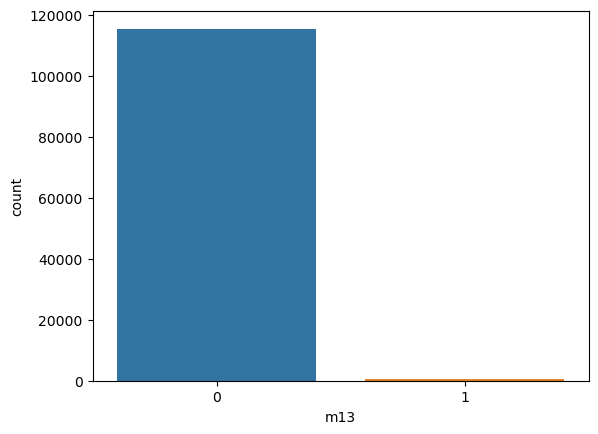

In [9]:
sns.countplot(x='m13',data=data)
plt.show()

C:\Users\sgv30\AppData\Local\Temp\ipykernel_24572\660376266.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


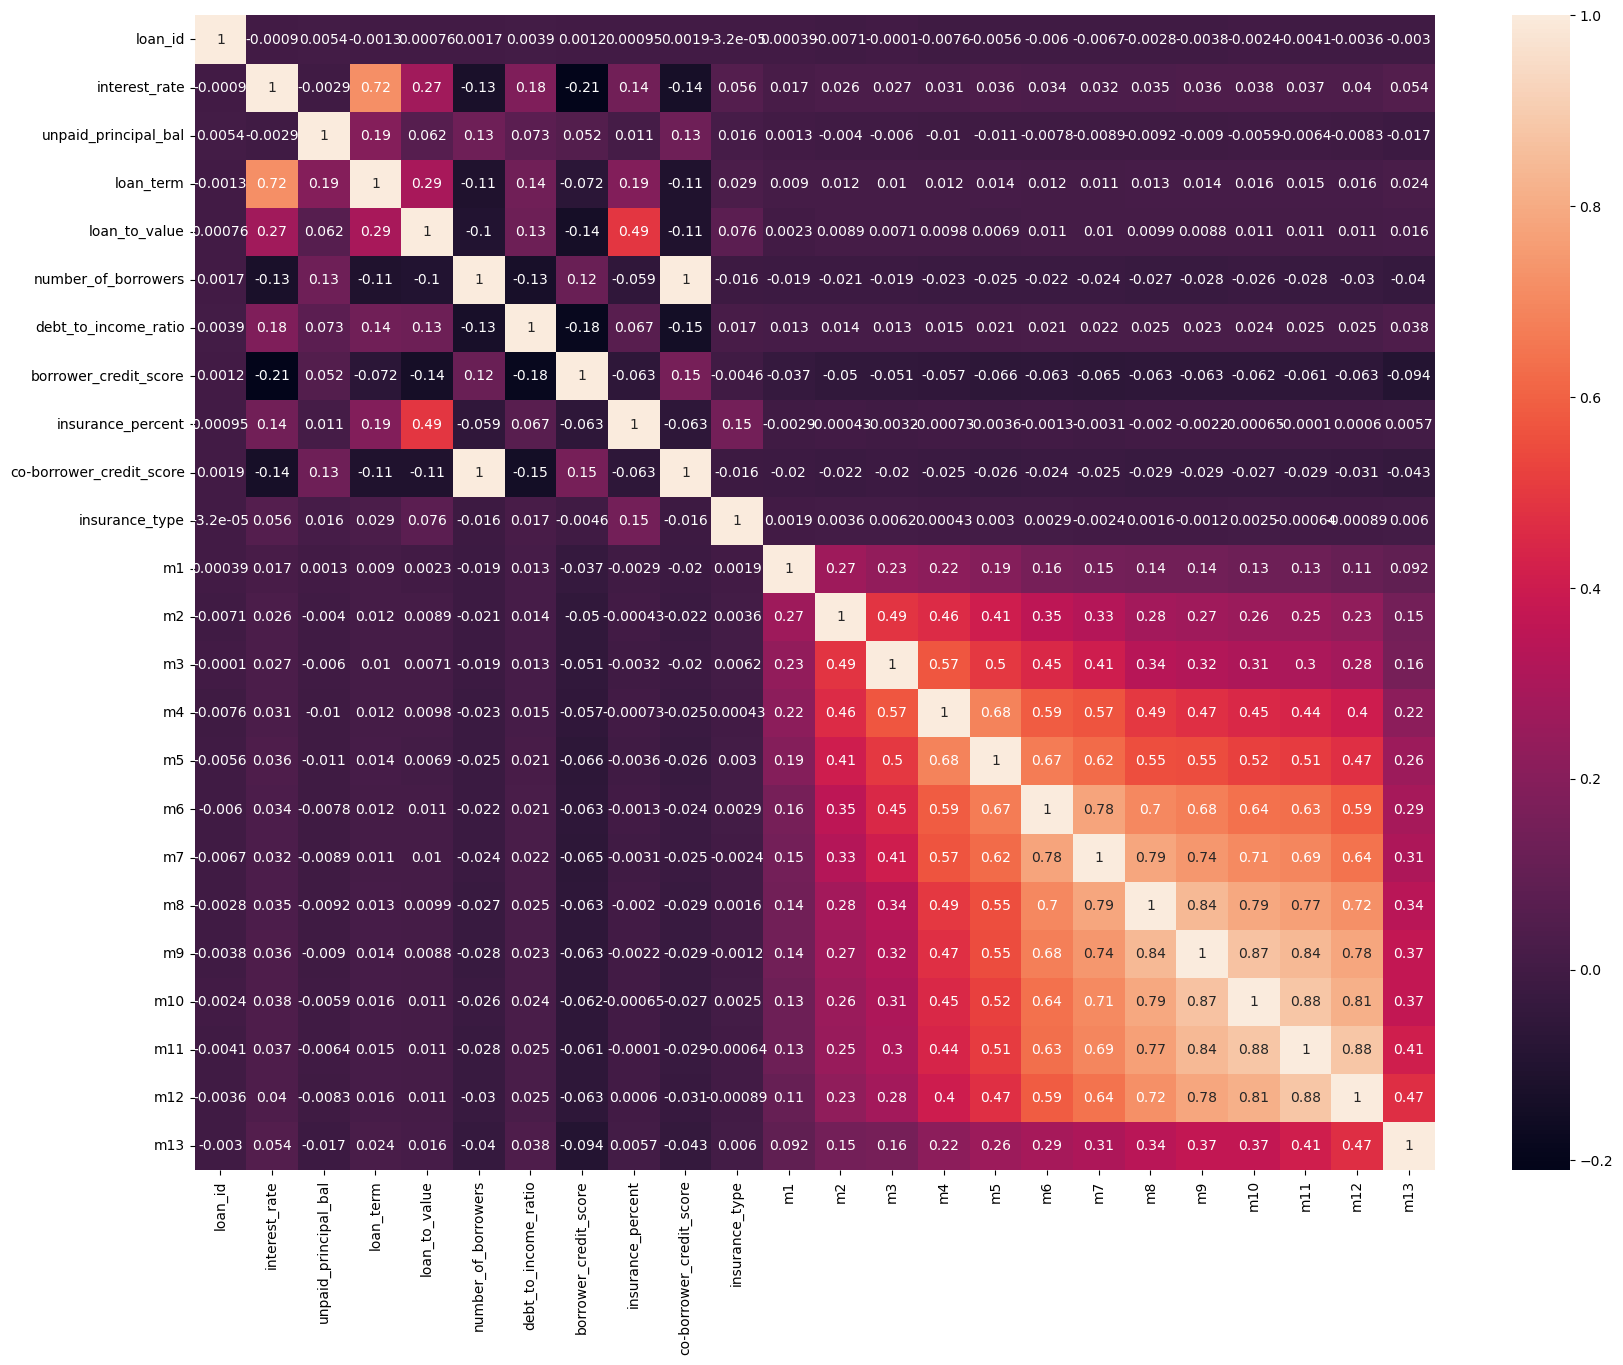

In [10]:
cor=data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor,annot=True)
plt.show()

In [11]:
x = data.drop(columns='m13')
y = data['m13']

In [12]:
x = pd.get_dummies(x)

In [13]:
x.columns

Index(['loan_id', 'interest_rate', 'unpaid_principal_bal', 'loan_term',
       'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio',
       'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'source_X',
       'source_Y', 'source_Z', 'financial_institution_Anderson-Taylor',
       'financial_institution_Browning-Hart',
       'financial_institution_Chapman-Mcmahon',
       'financial_institution_Cole, Brooks and Vincent',
       'financial_institution_Edwards-Hoffman',
       'financial_institution_Martinez, Duffy and Bird',
       'financial_institution_Miller, Mcclure and Allen',
       'financial_institution_Nicholson Group', 'financial_institution_OTHER',
       'financial_institution_Richards-Walters',
       'financial_institution_Richardson Ltd',
       'financial_institution_Romero, Woods and Johnson',
       'financial_institution_Sanchez,

In [14]:
x["total_credit_score"] = x['borrower_credit_score'] + x['co-borrower_credit_score']

In [15]:
x = x.drop(['borrower_credit_score','co-borrower_credit_score'], axis=1)

In [16]:
# importing libraries
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split

In [17]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)

# voting classification 

In [18]:
DTModel_=DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state = 33)
RFCModule_=RandomForestClassifier(n_estimators=100,max_depth=2, random_state=33)
SVCModel_=SVC(kernel= 'rbf', max_iter=1000,C=10,gamma='auto')

In [19]:
VotingClassifierModel = VotingClassifier(estimators=[('DTModel',DTModel_),('RFCModule',RFCModule_),('SVCModel',SVCModel_)],voting='hard')
VotingClassifierModel.fit(X_test, y_test)

C:\Users\sgv30\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


VotingClassifier(estimators=[('DTModel',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     random_state=33)),
                             ('RFCModule',
                              RandomForestClassifier(max_depth=2,
                                                     random_state=33)),
                             ('SVCModel',
                              SVC(C=10, gamma='auto', max_iter=1000))])

In [20]:
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))

VotingClassifierModel Train Score is :  0.9952394287314478
VotingClassifierModel Test Score is :  0.9961657763225917


In [21]:
from sklearn.metrics import confusion_matrix
y_pred = VotingClassifierModel.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[23084     0]
 [   89    39]]


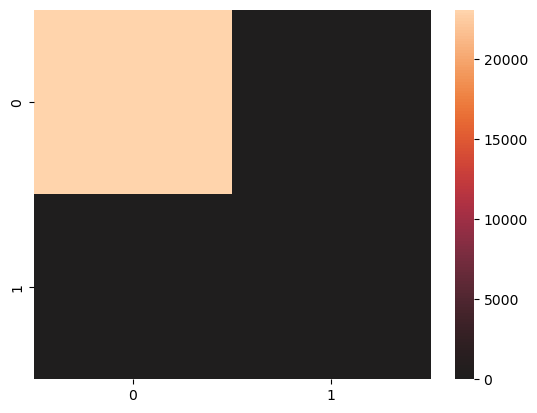

In [22]:
sns.heatmap(CM, center = True)
plt.show()

# bagging

In [23]:
from sklearn.ensemble import BaggingClassifier
estimator_range = [2,4,6,8,10,12,14,16]
models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

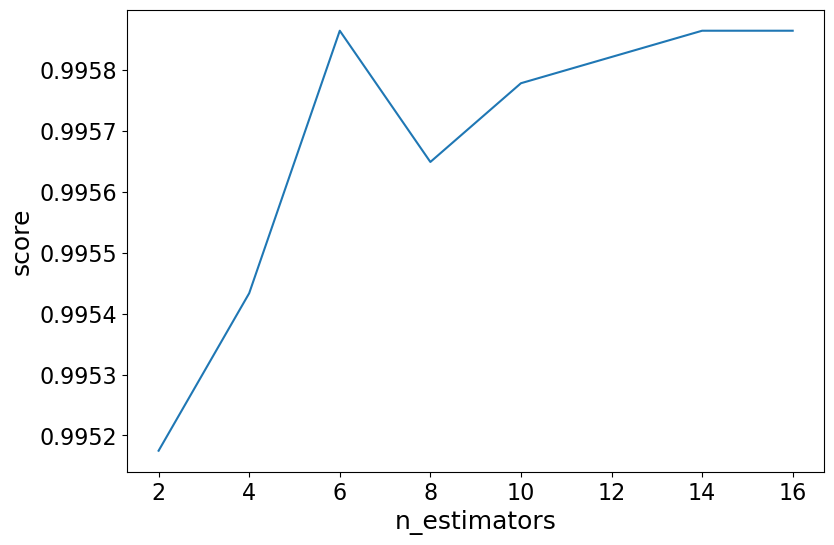

In [24]:
# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

# random forest classification

In [25]:
from sklearn.ensemble import RandomForestClassifier
RFCModule_=RandomForestClassifier(n_estimators=100,max_depth=2, random_state=33)
# Train the model on training data
RFCModule_.fit(X_train, y_train);

In [26]:
# Use the forest's predict method on the test data
predictions = RFCModule_.predict(X_test)


In [27]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy score is: " +str(acc))

[[23084     0]
 [   89    39]]
Accuracy score is: 99.61657763225918


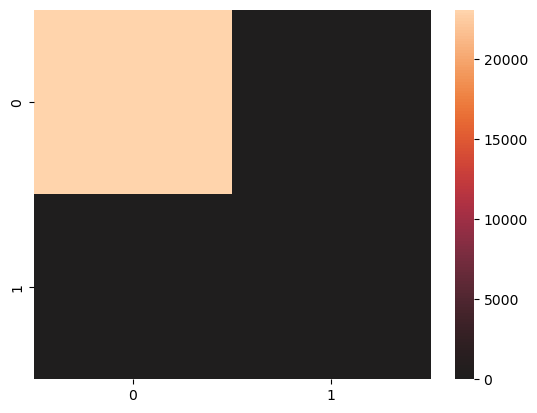

In [28]:
sns.heatmap(cm, center = True)
plt.show()

In [29]:
score = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print("f1 score is " + str(f1_score))

f1 score is 0.46706586826347307
